In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
results = "results/results.csv"
df = pd.read_csv(results)
df.head()

,checkpoint,percentage_from_total_masked,percentage_from_seen_masked,emails_leaked_masked,percentage_from_total_original,percentage_from_seen_original,emails_leaked_original
0,10,0.008549,0.088261,2,0.042746,0.171174,10
1,20,0.017098,0.090539,4,0.081217,0.201634,19
2,30,0.017098,0.059286,4,0.102590,0.196996,24
3,40,0.029922,0.077735,7,0.132513,0.214088,31
4,50,0.029922,0.061328,7,0.162435,0.233243,38


In [3]:
def extract_emails(text):
    emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)
    emails = [email.lower() for email in emails]
    return set(emails)

In [4]:
with open('datasets/enron/training.txt', 'r') as file:
    train_data = file.read()
ORIGINAL_SET = extract_emails(train_data)

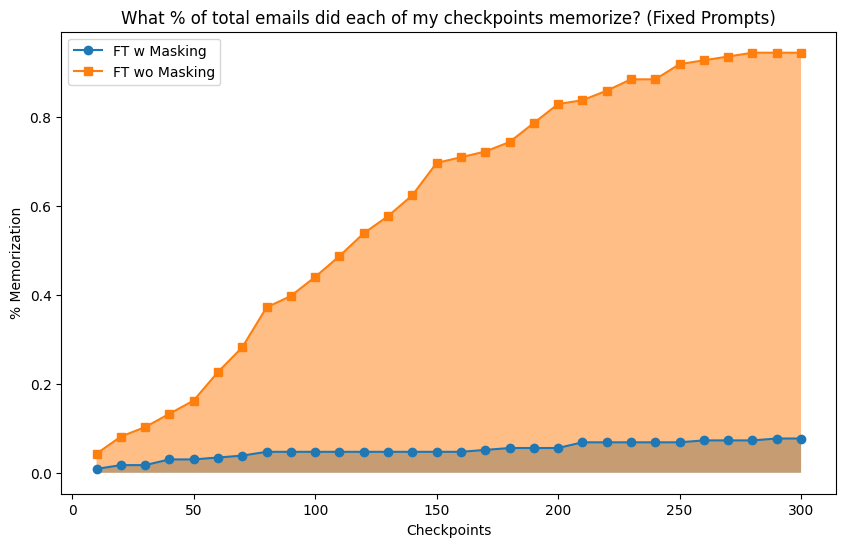

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df['checkpoint'], df['percentage_from_total_masked'], marker = 'o', label = 'FT w Masking')
plt.plot(df['checkpoint'], df['percentage_from_total_original'], marker = 's', label = 'FT wo Masking')
plt.fill_between(df['checkpoint'], df['percentage_from_total_masked'], alpha=0.5, label='_nolegend_')
plt.fill_between(df['checkpoint'], df['percentage_from_total_original'], alpha=0.5, label='_nolegend_')

plt.xlabel('Checkpoints')
plt.ylabel('% Memorization')
plt.title('What % of total emails did each of my checkpoints memorize? (Fixed Prompts)')
plt.legend()
plt.show()

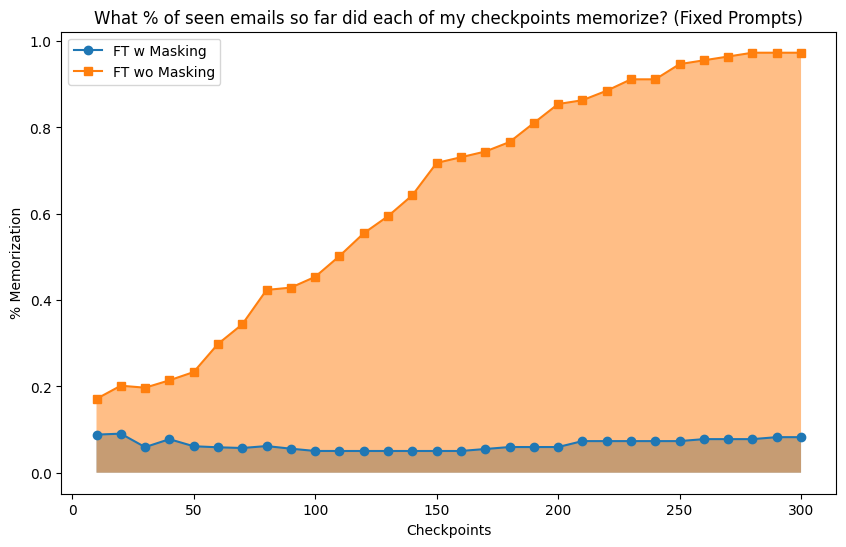

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df['checkpoint'], df['percentage_from_seen_masked'], marker = 'o', label = 'FT w Masking')
plt.plot(df['checkpoint'], df['percentage_from_seen_original'], marker = 's', label = 'FT wo Masking')
plt.fill_between(df['checkpoint'], df['percentage_from_seen_masked'], alpha=0.5, label='_nolegend_')
plt.fill_between(df['checkpoint'], df['percentage_from_seen_original'], alpha=0.5, label='_nolegend_')

plt.xlabel('Checkpoints')
plt.ylabel('% Memorization')
plt.title('What % of seen emails so far did each of my checkpoints memorize? (Fixed Prompts)')
plt.legend()
plt.show()

In [7]:
checkpoints = df['checkpoint'].to_list()
og_leaks = df['emails_leaked_original'].to_list()
re_leaks = df['emails_leaked_masked'].to_list()

In [8]:
nonel = {}
nonel['checkpoints'] = []
nonel['original'] = []
nonel['masked'] = []

for i in range(0, len(checkpoints)):
    if i == 0:
        nonel['original'].append(0)
        nonel['masked'].append(0)
    else:
        prev_leaked = re_leaks[i-1]
        now_leaked = re_leaks[i]
        num_leaked = now_leaked - prev_leaked
        nonel['masked'].append(num_leaked)
        
        prev_leaked = og_leaks[i-1]
        now_leaked = og_leaks[i]
        num_leaked = now_leaked - prev_leaked
        nonel['original'].append(num_leaked)
    nonel['checkpoints'].append(checkpoints[i])

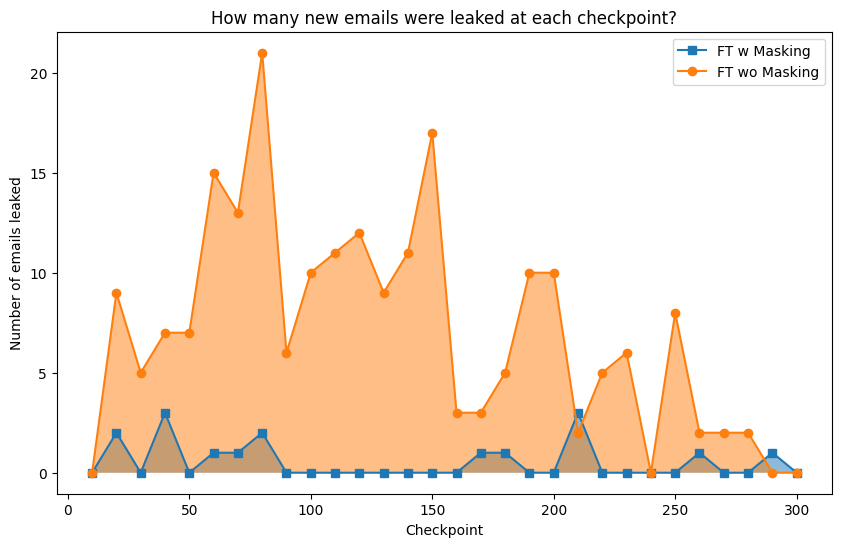

In [9]:
plt.figure(figsize=(10,6))

# Plot the lines
plt.plot(nonel['checkpoints'], nonel['masked'], marker='s', label='FT w Masking')
plt.plot(nonel['checkpoints'], nonel['original'], marker='o', label='FT wo Masking')


# Add fill below the lines

plt.fill_between(nonel['checkpoints'], nonel['masked'], alpha=0.5, label='_nolegend_')
plt.fill_between(nonel['checkpoints'], nonel['original'], alpha=0.5, label='_nolegend_')

plt.xlabel('Checkpoint')
plt.ylabel('Number of emails leaked')
plt.title('How many new emails were leaked at each checkpoint?')
plt.legend()
plt.show()

In [11]:
unmasked_perp = pd.read_csv("results/perp_calc_unmasked.csv")
masked_perp = pd.read_csv("results/perp_calc_masked_random.csv")

In [12]:
unmasked_perp = unmasked_perp.sort_values('checkpoint')
masked_perp = masked_perp.sort_values('checkpoint')

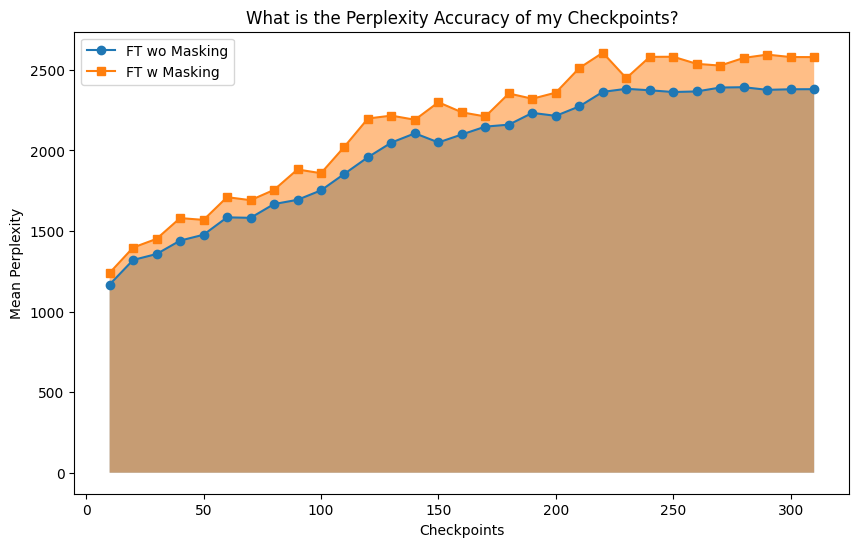

In [13]:
plt.figure(figsize=(10,6))
plt.plot(unmasked_perp['checkpoint'], unmasked_perp['mean_perplexity'], marker = 'o', label = 'FT wo Masking')
plt.plot(masked_perp['checkpoint'], masked_perp['mean_perplexity'], marker = 's', label = 'FT w Masking')
plt.fill_between(unmasked_perp['checkpoint'], unmasked_perp['mean_perplexity'], alpha=0.5, label='_nolegend_')
plt.fill_between(masked_perp['checkpoint'], masked_perp['mean_perplexity'], alpha=0.5, label='_nolegend_')

plt.xlabel('Checkpoints')
plt.ylabel('Mean Perplexity')
plt.title('What is the Perplexity Accuracy of my Checkpoints?')
plt.legend()
plt.show()